# Data Aggregation and Group Operations


In [ ]:
import numpy as np
import pandas as pd


Para entrar en este capitulo no perdamos de vista ésta idea **DIVIDIR - APLICAR - COMBINAR**

**Dividir:**  Separar los datos según una o mas claves.<br>
**Aplicar:**  Ejecutar una función sobre cada grupo.<br>
**Combinar:** Reunir los resultados en un nuevo objeto.<br>

Así Pandas ejecuta las operaciones de grupos mediante el método de <span style="color:blue">**.groupby( )**</span>

In [2]:
data = { 'Nombre' : ['Juan', 'Ana', 'Luis', 'Laura', 'Pedro', 'Carla'],
         'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Valencia', 'Barcelona', 'Madrid'],
         'Edad': [25, 33, 30, 28, 45, 38],
         'Puntuacion': [80, 90, 85, 88, 75, 91],
         'Categoria' : ['A','A','B','A','B','B']

}
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion,Categoria
0,Juan,Madrid,25,80,A
1,Ana,Barcelona,33,90,A
2,Luis,Madrid,30,85,B
3,Laura,Valencia,28,88,A
4,Pedro,Barcelona,45,75,B
5,Carla,Madrid,38,91,B


In [4]:
#Calcular la media de edad por ciudad
grouped = df["Edad"].groupby(df["Ciudad"])
#grouped.groups
grouped.mean()





Ciudad
Barcelona    39.0
Madrid       31.0
Valencia     28.0
Name: Edad, dtype: float64

**Dividir:**  grouped = df["Edad"].groupby(df["Ciudad"]) -> creamos los grupos por "Ciudad".<br>
**Aplicar:**  grouped.mean() -> Calculamos el promedio dentro de cada grupo.<br>
**Combinar:**  obtenemos una Series indexada por los valores únicos de "Ciudad", con sus promedios correspondientes.<br>

¡Ojito! <br>
.groups = Muestra cómo pandas separó los datos (diccionario con índices).<br>
.mean(), .sum(), .count() = Muestra los resultados de cálculos sobre cada grupo.

"Un DataFrame se puede agrupar por sus filas ( axis="index") o columnas ( axis="columns"). Una vez hecho esto, se aplica una función a cada grupo, generando un nuevo valor. Finalmente, los resultados de todas esas aplicaciones de función se combinan en un objeto resultante. La forma del objeto resultante suele depender del procesamiento de los datos."

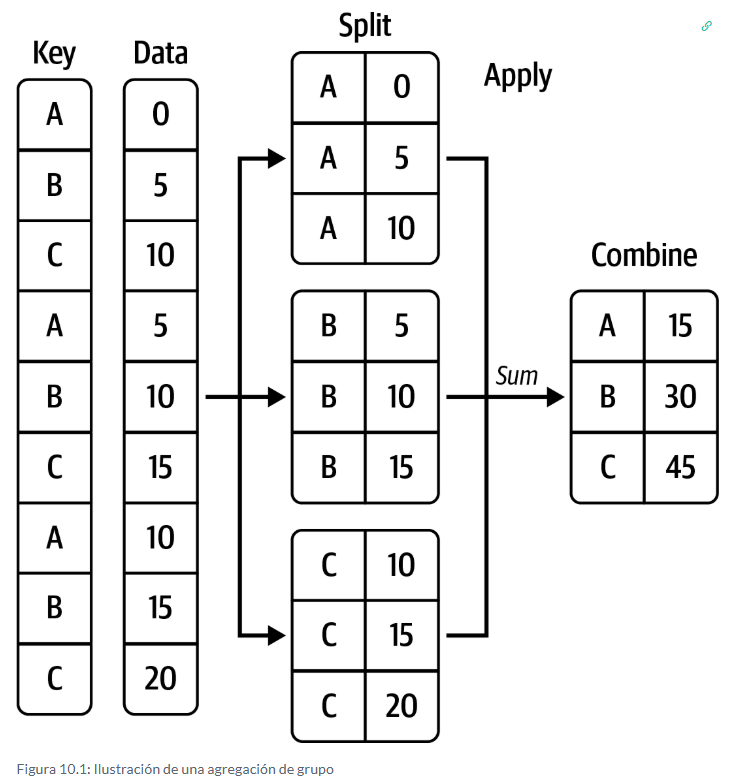

Cositas útiles!!<br>
**Seleccionar una columna o un subconjunto de columnas**

In [ ]:
#df.groupby(["Ciudad"])[["Edad"]].mean()
df.groupby(["Ciudad", "Categoria"])[["Edad"]].mean()

## Funciones de agregación

Las funciones de agregación procesan un arreglo de valores, y devuelven un escalar. En pandas, las funciones de agregación trabajan sobre Series. <br>
Ejemplos: sum, mean, count, min, max, any, all, agg, y muchas otras más.

In [3]:
peliculas = pd.DataFrame({
    "titulo": ["Matrix", "Titanic", "Inception", "Avatar", "Gladiator", "Shrek"],
    "genero": ["Sci-Fi", "Romance", "Sci-Fi", "Sci-Fi", "Acción", "Animación"],
    "año": [1999, 1997, 2010, 2009, 2000, 2001],
    "recaudacion": [465, 2187, 836, 2920, 457, 484],
    "rating": [8.7, 7.9, 8.8, 7.8, 8.5, 7.9]
})

print(peliculas)

      titulo     genero   año  recaudacion  rating
0     Matrix     Sci-Fi  1999          465     8.7
1    Titanic    Romance  1997         2187     7.9
2  Inception     Sci-Fi  2010          836     8.8
3     Avatar     Sci-Fi  2009         2920     7.8
4  Gladiator     Acción  2000          457     8.5
5      Shrek  Animación  2001          484     7.9


### Ejemplos de funciones de agregación con groupby

A continuación veremos dos ejemplos de cómo usar funciones de agregación (`mean` y `max`) combinadas con `groupby` sobre el dataset de películas:

In [4]:
#Calculemos el promedio de recaudación y rating agrupando por género.
#Primero creamos la agrupación para trabajar.
grouped = peliculas.groupby('genero')

print("Recaudación por género:")
recaudaciones = grouped['recaudacion'].mean()
print(recaudaciones)

Recaudación por género:
genero
Acción        457.0
Animación     484.0
Romance      2187.0
Sci-Fi       1407.0
Name: recaudacion, dtype: float64


In [5]:
print("Rating promedio por género:")
ratings = grouped['rating'].mean()
print(ratings)

Rating promedio por género:
genero
Acción       8.500000
Animación    7.900000
Romance      7.900000
Sci-Fi       8.433333
Name: rating, dtype: float64


In [6]:
print("Promedios de múltiples columnas:")
promedios_multiples = peliculas.groupby('genero')[['recaudacion', 'rating']].mean()
print(promedios_multiples)

Promedios de múltiples columnas:
           recaudacion    rating
genero                          
Acción           457.0  8.500000
Animación        484.0  7.900000
Romance         2187.0  7.900000
Sci-Fi          1407.0  8.433333


#### Máximo (max) por género

Encontremos los valores máximos de recaudación y rating agrupando por género:

In [7]:
max_recaudacion = grouped['recaudacion'].max()
print(max_recaudacion)

genero
Acción        457
Animación     484
Romance      2187
Sci-Fi       2920
Name: recaudacion, dtype: int64


In [8]:
#Película con mayor rating
rating_maximo = grouped['rating'].max()
print(rating_maximo)

genero
Acción       8.5
Animación    7.9
Romance      7.9
Sci-Fi       8.8
Name: rating, dtype: float64


#### Uso de `agg`

In [9]:

rascacielos = pd.DataFrame({
    "nombre": [
        "Burj Khalifa", "Shanghai Tower", "Abraj Al-Bait Clock Tower",
        "Ping An Finance Center", "Lotte World Tower",
        "One World Trade Center", "Taipei 101", "Petronas Towers"
    ],
    "pais": [
        "Emiratos Árabes", "China", "Arabia Saudita",
        "China", "Corea del Sur",
        "EE.UU.", "Taiwán", "Malasia"
    ],
    "altura": [828, 632, 601, 599, 555, 541, 509, 452],
    "pisos": [163, 128, 120, 115, 123, 104, 101, 88],
    "year": [2010, 2015, 2012, 2017, 2016, 2014, 2004, 1998]
})

rascacielos

,nombre,pais,altura,pisos,year
0,Burj Khalifa,Emiratos Árabes,828,163,2010
1,Shanghai Tower,China,632,128,2015
2,Abraj Al-Bait Clock Tower,Arabia Saudita,601,120,2012
3,Ping An Finance Center,China,599,115,2017
4,Lotte World Tower,Corea del Sur,555,123,2016
5,One World Trade Center,EE.UU.,541,104,2014
6,Taipei 101,Taiwán,509,101,2004
7,Petronas Towers,Malasia,452,88,1998


Usando `agg` con varias funciones de agregación implementadas.

In [10]:
rascacielos.groupby("pais").agg(
    max_altura=("altura", "max"),
    promedio_altura=("altura", "mean"),
    total_rascacielos=("nombre", "count"),
    max_pisos=("pisos", "max")
).reset_index()

,pais,max_altura,promedio_altura,total_rascacielos,max_pisos
0,Arabia Saudita,601,601.0,1,120
1,China,632,615.5,2,128
2,Corea del Sur,555,555.0,1,123
3,EE.UU.,541,541.0,1,104
4,Emiratos Árabes,828,828.0,1,163
5,Malasia,452,452.0,1,88
6,Taiwán,509,509.0,1,101


Usando `agg` con funciones de agregación personalizadas

In [11]:
rascacielos.groupby("pais").agg(
    rango_tiempo=("year", lambda x: f"{x.min()} - {x.max()}")
).reset_index()

,pais,rango_tiempo
0,Arabia Saudita,2012 - 2012
1,China,2015 - 2017
2,Corea del Sur,2016 - 2016
3,EE.UU.,2014 - 2014
4,Emiratos Árabes,2010 - 2010
5,Malasia,1998 - 1998
6,Taiwán,2004 - 2004


### El método `apply`: un split-apply-combine general

In [12]:
compras = pd.DataFrame({
    "producto": [
        "Notebook Lenovo", "Mouse Logitech", "Monitor Samsung",
        "Celular iPhone", "Placa de Video RTX 4070", "Teclado Mecánico"
    ],
    "categoria": [
        "Computadoras", "Periféricos", "Monitores",
        "Celulares", "Componentes", "Periféricos"
    ],
    "precio": [850, 25, 220, 1200, 650, 80],
    "cantidad": [2, 10, 4, 3, 1, 6],
    "origen": ["Importado", "Importado", "Nacional", "Importado", "Importado", "Nacional"]
})

compras

,producto,categoria,precio,cantidad,origen
0,Notebook Lenovo,Computadoras,850,2,Importado
1,Mouse Logitech,Periféricos,25,10,Importado
2,Monitor Samsung,Monitores,220,4,Nacional
3,Celular iPhone,Celulares,1200,3,Importado
4,Placa de Video RTX 4070,Componentes,650,1,Importado
5,Teclado Mecánico,Periféricos,80,6,Nacional


Ejemplo de `apply` para calcular el costo total de cada compra

In [13]:
compras["total"] = compras.apply(
    lambda fila: fila["precio"] * fila["cantidad"], axis=1
)
compras[["producto", "precio", "total"]]

,producto,precio,total
0,Notebook Lenovo,850,1700
1,Mouse Logitech,25,250
2,Monitor Samsung,220,880
3,Celular iPhone,1200,3600
4,Placa de Video RTX 4070,650,650
5,Teclado Mecánico,80,480


Mismo ejemplo anterior, pero agregando un impuesto del 21% a compras del exterior

In [14]:
def total_unitario_con_impuesto(fila):
    cantidad = fila["cantidad"]
    precio = fila["precio"]
    if fila["origen"] == "Importado":
        return round(precio * 1.21 * cantidad, 2)
    return round(cantidad * precio, 2)

compras["total"] = compras.apply(total_unitario_con_impuesto, axis=1)
print(compras[["producto", "origen", "precio", "cantidad", "total"]])

                  producto     origen  precio  cantidad   total
0          Notebook Lenovo  Importado     850         2  2057.0
1           Mouse Logitech  Importado      25        10   302.5
2          Monitor Samsung   Nacional     220         4   880.0
3           Celular iPhone  Importado    1200         3  4356.0
4  Placa de Video RTX 4070  Importado     650         1   786.5
5         Teclado Mecánico   Nacional      80         6   480.0


**Transform** 

El resultado que devuelve es del mismo tamaño que la entrada.<br>
Cada valor de la columna transformada mantiene la alineacion con las filas originales. <br>
Ideal para cuando uno quiere reemplazar valosres o crear nuevas columnas sin perder la forma del DataFrame. <br>

Entonces  <span style="color:blue">**.transform()**</span> si uno necesita que cada fila conserve su posición y alineación pero con valores transformados.

In [3]:
#df.groupby(['Categoria', 'Ciudad'])['Puntuacion'].mean() # sin usar .transform()
df['Puntuacion_promedio_categoria'] = df.groupby(['Categoria', 'Ciudad'])['Puntuacion'].transform('mean')
df

,Nombre,Ciudad,Edad,Puntuacion,Categoria,Puntuacion_promedio_categoria
0,Juan,Madrid,25,80,A,80.0
1,Ana,Barcelona,33,90,A,90.0
2,Luis,Madrid,30,85,B,88.0
3,Laura,Valencia,28,88,A,88.0
4,Pedro,Barcelona,45,75,B,75.0
5,Carla,Madrid,38,91,B,88.0


**Tablas dinámicas**

Os queremos felicitar, queridos internautas. Han llegado casi al final del mini curso. Ahora, por último, hablaremos de tablas dinámicas. <br> 

La tabla dinámica organiza la información en forma de tabla, permitiendo:<br>
a) Agrupar por filas y columnas. <br>
b) Aplicar funciones estadísticas (media, suma, conteo, etc.). <br>
c) Comparar categorías fácilmente.

En Pandas se implementa con <span style="color:blue">**.pivot_table()**</span>, lo que hace es tomar los datos del DataFrame original y los reorganiza en una tabla completamente nueva, donde los valores están resumidos según las reglas de agrupación y la función de agregación especificadas


In [5]:
#Promedio de las puntuaciones agrupadas por ciudad y por categoría
tabla_dinamica = df.pivot_table(
    index='Ciudad',
    columns='Categoria',
    values='Puntuacion',
    aggfunc='mean'
)
tabla_dinamica

Categoria,A,B
Ciudad,,
Barcelona,90.0,75.0
Madrid,80.0,88.0
Valencia,88.0,NaN


**¿Tenés la duda existencial de cuando ocupar groupby o pivot_table?** No te preocupes te explicamos a continuación. <br>

<span style="color:blue">**.groupby()**</span><br>

Sirve para agrupar datos y luego calcular estadísticas (promedio, suma, conteo, etc.), si querés hacer varios pasos como agrupar, calcular, volver a ordenar, renombrar columnas, etc. es recomendable este metodo, pero ¡ojo! el resultado no siempre es tan “presentable”, porque te devuelve índices múltiples o estructuras menos legibles. <br>

<span style="color:blue">**.pivot_table()**</span><br>

Sirve para resumir y mostrar datos de una manera clara, como en Excel,directamente te devuelve una tabla lista para análisis o presentación, no está pensado tanto para seguir encadenando cálculos, sino para visualizar bien los resultados.

**Tabla cruzada** <br>
Una tabulación cruzada (o *tabla cruzada* , para abreviar) es un caso especial de tabla dinámica que calcula frecuencias de grupo<br>

Este comando <span style="color:blue">**.crosstab()**</span> crea una tabla de frecuencias cruzadas.<br>

En términos sencillos, el script:
**Analiza dos variables: Se fija en las columnas 'Ciudad' y 'Categoria'.**
**Cuenta las combinaciones:** Cuenta cuántas veces aparece cada combinación única de valores en esas dos columnas. Por ejemplo, cuántas personas de Madrid son de la Categoría A, cuántas son de la Categoría B, cuántas de Barcelona son de la Categoría A, etc.

El resultado es una tabla que te permite ver rápidamente el número de personas en cada grupo, sin necesidad de calcular promedios ni sumas. Es ideal para analizar la relación o distribución entre dos variables categóricas.

In [6]:
tabulacion_cruzada = pd.crosstab(df['Ciudad'], df['Categoria'])
tabulacion_cruzada

Categoria,A,B
Ciudad,,
Barcelona,1,1
Madrid,1,2
Valencia,1,0
